In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

<p style='font-size:18px; line-height:2.5em'> We will solve a regression problem using neural network.
    
Data is generated from: 
$y=\sin(x) + \epsilon, \text{  where  } \epsilon \sim N(0, 0.1)$ denotes a random noise.

**Data generation**

In [2]:
N = 10                                                 # Number of samples
x = np.linspace(0, 2*np.pi, N).reshape(-1,1)           # Input data
y = np.sin(x) + 0.1*np.random.randn(N,1).reshape(-1,1)   # Target data

# Check the shape

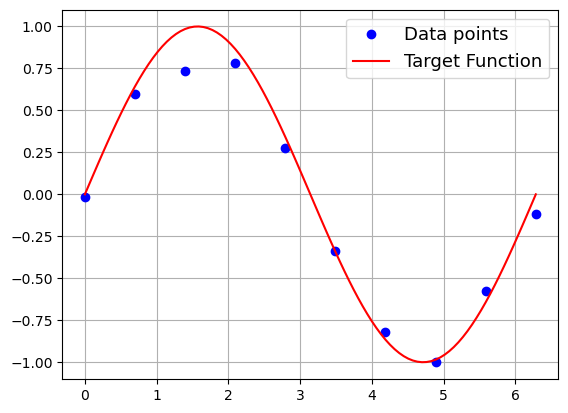

In [4]:
plt.plot(x, y, 'bo', label='Data points')
plt.plot(np.linspace(0,2*np.pi,100), np.sin(np.linspace(0,2*np.pi,100)), 'r', label='Target Function')
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

**Build NN**

In [5]:
in_d = np.shape(x)[1]
out_d = np.shape(y)[1]

hidden1_d = 100

#initialize weights in ANN (2 input dim, 1 hidden layer with dimension of 2, 1 output dim)
w1, w2 = randn(in_d, hidden1_d), randn(hidden1_d, out_d)
b1, b2 = randn(1, hidden1_d), randn(1, out_d)

In [6]:
b1

array([[-3.96927126e-01, -8.56254325e-01,  1.38318581e+00,
         7.78733067e-01,  1.29988798e+00,  3.97785195e-01,
         7.57869766e-01, -8.75919044e-01, -8.80557887e-01,
         7.28033112e-01, -8.91339084e-01,  2.15391423e-01,
        -1.24791769e+00, -1.10247619e+00, -6.32940244e-01,
         9.34955460e-01,  2.53531304e-01,  6.46754993e-01,
        -5.34979838e-01, -1.31576470e+00, -6.60551325e-01,
        -1.44760689e+00,  7.32121096e-01, -2.43771891e-01,
         3.01761568e-01, -1.04277848e+00,  7.37294004e-02,
         2.34399103e-01,  4.27373567e-01,  7.52050087e-01,
        -2.75855696e-01,  5.04283246e-01,  9.25932665e-01,
        -4.80251685e-01,  4.29312268e-01,  1.63166802e-02,
         9.76268496e-01, -7.88784124e-02, -1.37917068e+00,
        -7.71235824e-01, -3.03306409e-03,  2.05487357e-01,
        -1.40765721e+00,  4.52553545e-01, -1.79593979e+00,
         4.25890130e-02,  1.69996079e-01,  6.57256832e-01,
         9.74947076e-01, -2.94230513e-01,  2.27893035e-0

In [ ]:
m1 = 0; m2 = 0;  beta = 0.9;
m3 =  0; m4 = 0;
lr = 1e-4 #learning rate
for t in range(40000):
    # Forward pass
    s = 1 / (1 + np.exp(-(x.dot(w1) + b1)))  # Choose activation function (e.g.: sigmoid)
    y_pred = s.dot(w2) + b2
    # b2 -= lr * db2
    loss = np.square(y_pred - y).mean()



    # Backpropagation
    dy_pred = 2 * (y_pred - y)
    dw2 = s.T.dot(dy_pred)
    db2 = np.mean(dy_pred, axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh * s * (1 - s))
    db1 = np.mean(dh * s * (1 - s), axis=0)

    # Update weights and biases
    m1 = beta*m1 + (1-beta) * dw1
    m2 = beta*m2 + (1-beta) * dw2
    m3 = beta*m3 + (1-beta) * db1
    m4 = beta*m4 + (1-beta) * db2

    w1 -= lr * m1
    w2 -= lr * m2
    b1 -= lr * m3
    b2 -= lr * m4

    # w1 -= lr * dw1
    # w2 -= lr * dw2
    # b2 -= lr * db2 - y).mean()
    print(t, train_loss)

0 0.02374684620859895
100 0.02372682261849208
200 0.02370510547173204
300 0.023683462601815468
400 0.023661893583257137
500 0.023640397948351422
600 0.02361897523407949
700 0.023597624982046476
800 0.023576346738420524
900 0.02355514005387258
1000 0.023534004483515676
1100 0.023512939586847286
1200 0.023491944927691178
1300 0.02347102007413887
1400 0.023450164598497407
1500 0.023429378077229206
1600 0.023408660090902596
1700 0.023388010224134705
1800 0.02336742806554097
1900 0.02334691320768254
2000 0.023326465247014965
2100 0.023306083783839214
2200 0.023285768422250965
2300 0.023265518770092315
2400 0.023245334438904804
2500 0.023225215043880688
2600 0.023205160203817778
2700 0.02318516954107343
2800 0.023165242681519486
2900 0.023145379254497767
3000 0.023125578892777353
3100 0.023105841232510527
3200 0.02308616591319114
3300 0.023066552577612934
3400 0.023047000871829173
3500 0.023027510445111175
3600 0.023008080949909908
3700 0.02298871204181558
3800 0.02296940337952073
3900 0.022

In [ ]:
b1

In [10]:
#Final evaluation for ANN using test dataset
s = 1 / (1 + np.exp(-(x.dot(w1) + b1)))
loss = np.square(s.dot(w2) + b2 - y).mean()

print(loss)

0.018433433115092553


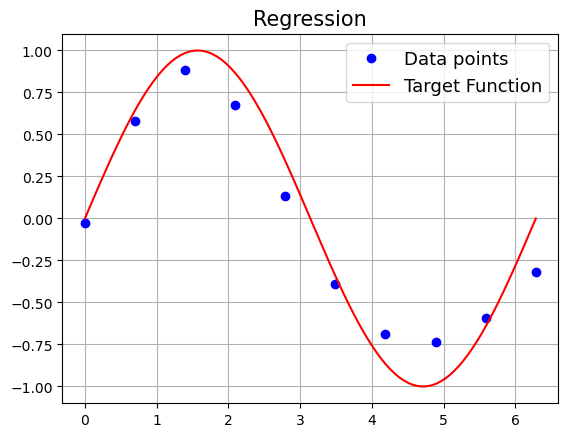

In [12]:
plt.plot(x, y_pred, 'bo', label='Data points')
plt.plot(np.linspace(0,2*np.pi,100), np.sin(np.linspace(0,2*np.pi,100)), 'r', label='Target Function')
plt.legend(fontsize=13)
plt.title('Regression', fontsize=15)
plt.grid(True)